In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
data=pd.read_csv("test.csv")#data set was uploaded to the working environemnt contnet  folder

In [11]:
data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [12]:
data.shape

(300, 2)

In [13]:
x=data['x']
y=data['y']

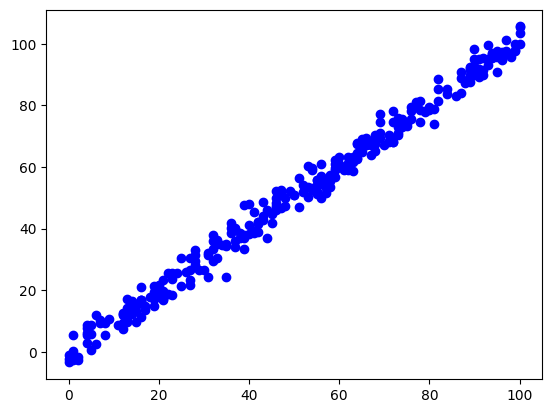

In [14]:
plt.scatter(x,y,c='b')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

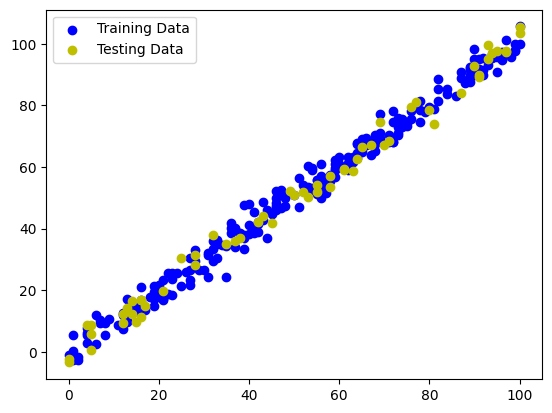

In [16]:
plt.scatter(X_train,y_train,c='b',label="Training Data")
plt.scatter(X_test,y_test,c='y',label="Testing Data")
plt.legend()
plt.show()

In [17]:
X_train.shape, X_test.shape

((240,), (60,))

Model building

In [18]:
# create a model 1s model is the most basic mdoel. improved mode is the second one
#model = tf.keras.Sequential([
#    tf.keras.layers.Dense(4,input_shape=(1,)),#first hidden layer
#    tf.keras.layers.Dense(1)#output layer
#])

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,input_shape=(1,)),#first hidden layer
    tf.keras.layers.Dense(10),#second hidden layer
    tf.keras.layers.Dense(1)#output layer
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# train the model
epoch_number = 4
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/4


c:\Users\shara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.1157 - mae: 43.1157  
Epoch 2/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7371 - mae: 13.7371 
Epoch 3/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4205 - mae: 8.4205   
Epoch 4/4
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3827 - mae: 5.3827 


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.76 KB)

 Trainable params: 405 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 812 (3.18 KB)

In [20]:
y_predictions=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [21]:
y_predictions[:5]

array([[81.50807 ],
       [68.86885 ],
       [85.11926 ],
       [ 4.769983],
       [82.41086 ]], dtype=float32)

In [22]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

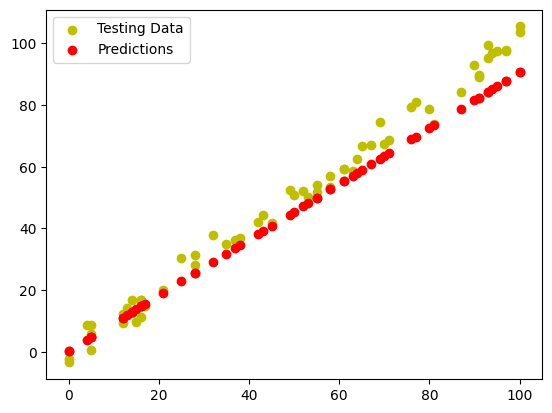

In [23]:
plt.scatter(X_test,y_test,c='y',label="Testing Data")
plt.scatter(X_test,y_predictions,c='r',label="Predictions")
plt.legend()
plt.show()

In [24]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3315 - mae: 5.3315


[5.331526756286621, 5.331526756286621]

In [25]:
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_predictions))
mae_value = mae_metric.result().numpy()
print("MAE:", mae_value)
#squeeze used to make y predictions in to 1D format, becuase it is in the 2D format

MAE: 5.3315263


In [26]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_predictions))
mse_value = mse_metric.result().numpy()
print("MSE:", mse_value)

MSE: 43.27389


In [27]:
history.history#gives the loss values of each epoch.

{'loss': [43.11567687988281,
  13.737065315246582,
  8.420470237731934,
  5.382664203643799],
 'mae': [43.11567687988281,
  13.737065315246582,
  8.420470237731934,
  5.382664203643799]}

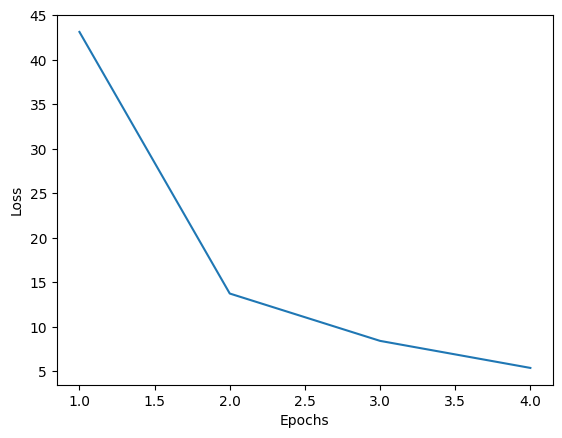

In [28]:
x_range=range(1,epoch_number+1)
plt.plot(x_range,history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [29]:
#weight values and biased terms of the each neuron.
for layer in model.layers:
    weights=layer.get_weights()[0]
    biases=layer.get_weights()[1]
    print(f"\nWeights:\n{weights}\n\nBiased:\n{biases}")


Weights:
[[-0.03765361  0.3658685   0.22080442 -0.34437907 -0.08616791 -0.246426
  -0.22302976  0.39638036 -0.14030538 -0.41614005  0.04062873  0.2158425
   0.1226976   0.18037072  0.03492992  0.37797943  0.01051626  0.20383507
  -0.03537698 -0.282866    0.15411898 -0.01768521  0.25026107  0.3036281
  -0.18197376  0.12515517 -0.15239903 -0.1125401  -0.14206152  0.3807958
  -0.357719   -0.03276915]]

Biased:
[-0.10655414  0.02146596 -0.11236168  0.03431546 -0.03069723  0.0994508
  0.14644463  0.02516594  0.14430818 -0.03673356  0.07432437 -0.15331714
 -0.10082397  0.04914715  0.01764547 -0.04572377  0.00818101 -0.02498132
 -0.10677435  0.1054269  -0.09012662  0.14663722 -0.16670494 -0.11306162
 -0.04030286  0.04665678 -0.0130759   0.07167567  0.09220724  0.03820263
 -0.04445353 -0.01731603]

Weights:
[[-0.2551065   0.10956454  0.16704716 -0.0866827  -0.15692164 -0.2338036
   0.17780246  0.08427613 -0.00644374  0.15452138]
 [ 0.22128174  0.01353375 -0.23908833 -0.23766609 -0.4106536  -0